# Лабораторна робота №2 з глибинного навчання студента групи Ім-22 Овсюка Юрія

Для виконання даної лабораторної роботи було обрано наступні літери: **D, A, N, E**. 

Цим літерам відповідає наступне кодування: 

 - D - [1, -1, -1, -1];
 - A - [-1, 1, -1, -1]; 
 - N - [-1, -1, 1, -1];
 - E - [-1, -1, -1, 1].
 
Кожна з літер складається з матриці розмірності 5х5. Таким чином, кількість рецепторних нейронів складається з 25 елементів, а віхідних з 4 нейронів. База даних складається із 46 літер: 9 шаблонів - **D**, 15 шаблонів - **A**, 9 шаблонів - **N**, 10 шаблонів - **Е**. 

In [179]:
import numpy as np
import matplotlib.pyplot as plt

In [180]:
def prediction(inp, w): # функція прогнозування
    return np.sign(inp @ w.T)

def get_letter(ans): # функція вилучення літери прогнозу 
    
    ans = list(ans)
    try:
        
        letters = {
            "D":  [1, -1, -1, -1],
            "A":  [-1, 1, -1, -1],
            "N": [-1, -1, 1, -1],
            "E": [-1, -1, -1, 1]
        }

        key_list = list(letters.keys())
        val_list = list(letters.values())

        position = val_list.index(ans)
        
        print("Це літера " + key_list[position])
        
    except ValueError:
        print("Значення " + str(ans) + " не відповідає жодній з літер. Мережу варто перенавчити")
    

## Ініціалізація даних

## Використання передвизначених

In [181]:
data = np.array([[1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1],
                 [1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, -1, 1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
                 [-1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1],
                 [-1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1],
                 [1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1],
                 [1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1, -1],
                 [1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1, -1, -1],
                 [-1, -1, 1, 1, -1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, -1],
                 [-1, 1, 1, 1, -1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, -1],
                 
                 [-1, -1, 1, -1, -1, -1, 1, -1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1],
                 [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1],
                 [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
                 [-1, 1, 1, 1, -1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, -1, -1, -1, 1],
                 [-1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1],
                 [-1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1],
                 [1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1],
                 [1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1, -1],
                 [-1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1],
                 [-1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, -1, 1, -1],
                 [-1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1],
                 [-1, -1, -1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1],
                 [1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1, -1],
                 [-1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1, -1],
                 [-1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, 1, 1, 1, -1, -1, 1, -1, 1, -1, -1, -1, -1, -1],
                 
                 [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1],
                 [1, -1, -1, -1, 1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, -1, -1, -1, -1, -1],
                 [-1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1],
                 [1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, 1, 1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1],
                 [1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, -1, -1, -1, -1, -1],
                 [-1, -1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1],
                 [-1, -1, -1, -1, -1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1],
                 [-1, 1, -1, -1, 1, -1, 1, 1, -1, 1, -1, 1, -1, 1, 1, -1, 1,-1, -1, 1, -1, -1, -1, -1, -1],
                 [-1, -1, -1, -1, -1, 1, 1, -1, -1, 1, 1, -1, 1, -1, 1, 1, -1, -1, 1, 1, 1, -1, -1, -1, 1],
                 
                 [1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1],
                 [1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1],
                 [1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1],
                 [1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1],
                 [-1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1],
                 [-1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1],
                 [-1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1, 1, 1, 1],
                 [-1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1, -1, 1, -1, -1, -1, -1, 1, 1, 1, -1],
                 [-1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1],
                 [-1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1, -1, 1, -1, -1, -1, -1, 1, 1, -1, -1]])



y = np.array([
             [1, -1, -1, -1],
             [1, -1, -1, -1],
             [1, -1, -1, -1],
             [1, -1, -1, -1], 
             [1, -1, -1, -1],
             [1, -1, -1, -1],
             [1, -1, -1, -1],
             [1, -1, -1, -1], 
             [1, -1, -1, -1],
              
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
             [-1, 1, -1, -1],
              
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              [-1, -1, 1, -1],
              
              [-1, -1, -1, 1], 
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1],
              [-1, -1, -1, 1]])



## Виведення бази даних

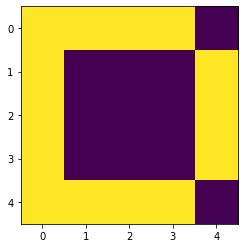

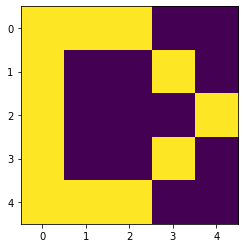

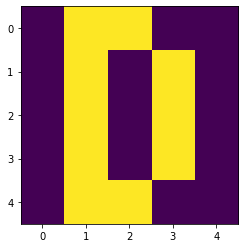

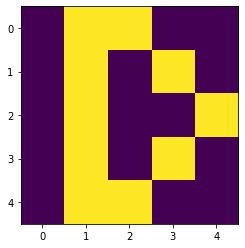

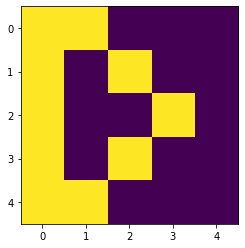

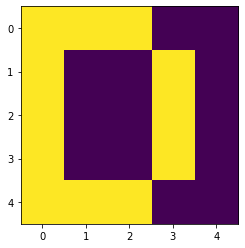

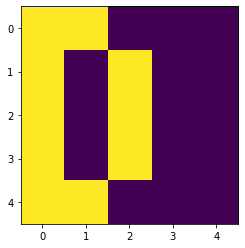

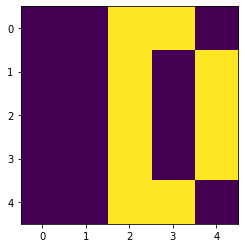

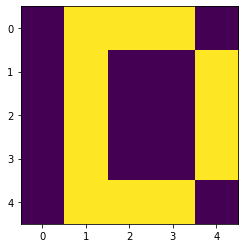

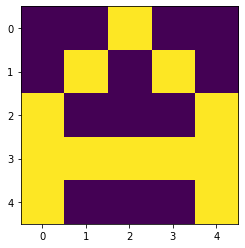

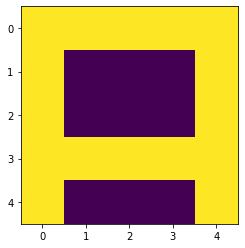

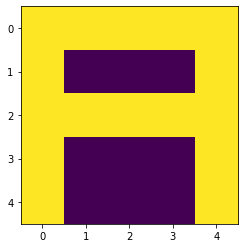

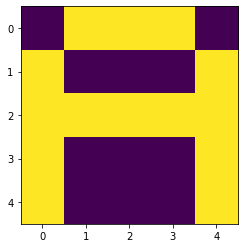

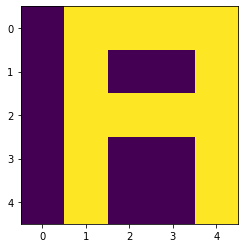

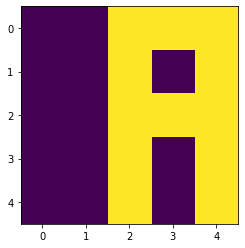

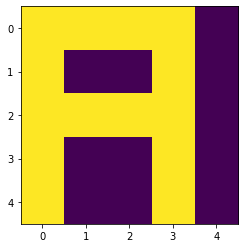

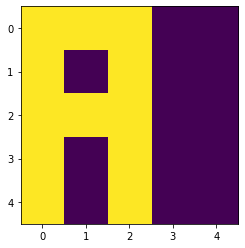

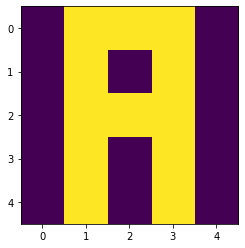

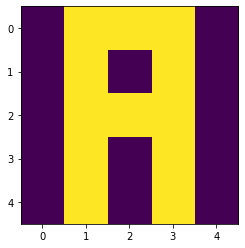

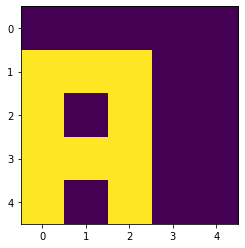

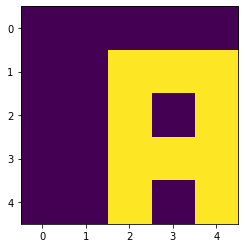

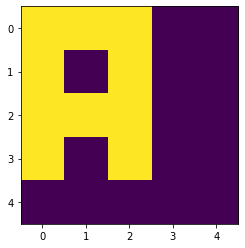

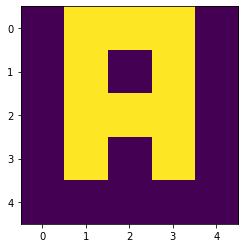

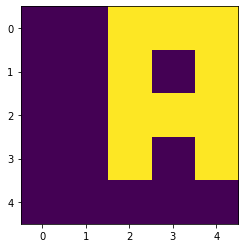

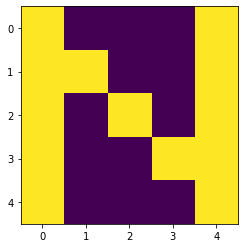

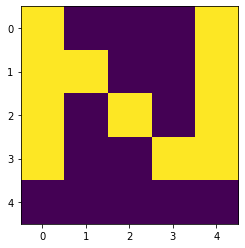

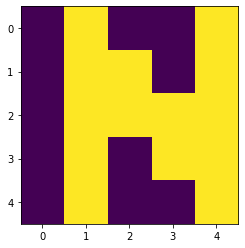

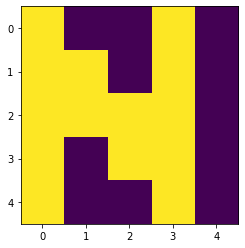

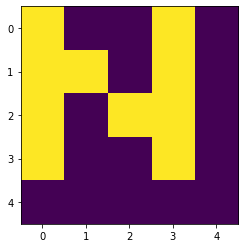

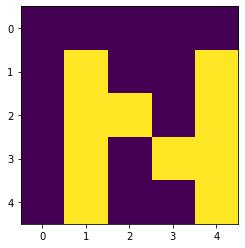

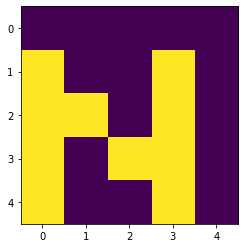

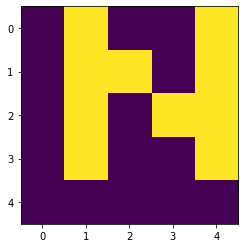

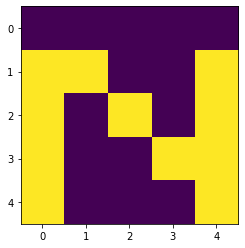

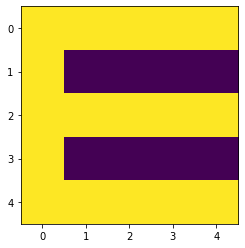

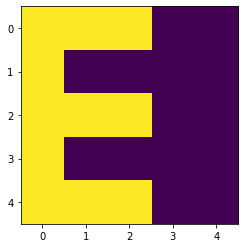

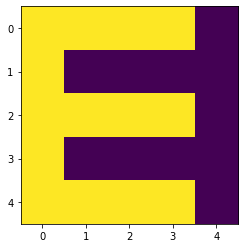

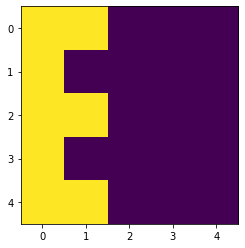

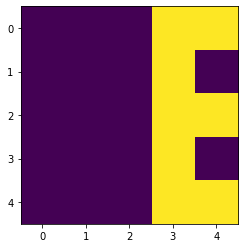

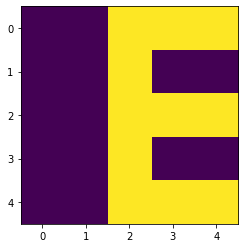

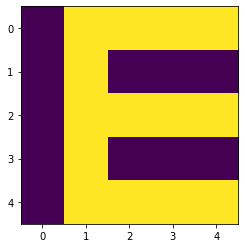

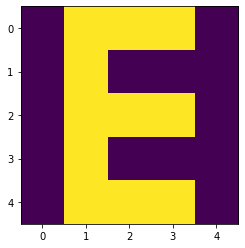

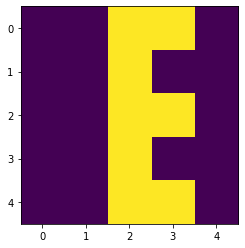

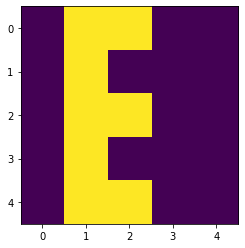

In [112]:
for i in range(data.shape[0]):
    plt.imshow(data[i].reshape((5, 5)), interpolation='nearest')
    plt.show()

## Додавання базису та ініціалізація вагових коефіцієнтів нулями

In [182]:
x_0 = np.ones((data.shape[0], 1))

train_X = np.concatenate((data, x_0), axis=1)
train_y = np.copy(y)
weights = np.zeros((train_y.shape[1], train_X.shape[1]))


## Процедура навчання

In [183]:
num_it = 5
for i in range(num_it):
    j = 0
    while j < train_X.shape[0]:
        print("Навчаємось на шаблоні " + str(j+1))
        train_X_new = train_X[j].reshape(1, -1)
        train_y_new = train_y[j].reshape(1, -1)
        delta_weights = train_y_new.T @ train_X_new
        weights = weights + delta_weights

        if not np.all(prediction(train_X_new, weights) == train_y_new):
            j -= 1
        else: 
            j += 1

Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 4
Навчаємось на шаблоні 5
Навчаємось на шаблоні 6
Навчаємось на шаблоні 7
Навчаємось на шаблоні 8
Навчаємось на шаблоні 7
Навчаємось на шаблоні 8
Навчаємось на шаблоні 9
Навчаємось на шаблоні 10
Навчаємось на шаблоні 11
Навчаємось на шаблоні 12
Навчаємось на шаблоні 13
Навчаємось на шаблоні 14
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 17
Навчаємось на шаблоні 16
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 22
Навчаємось на шаблоні 23
Навчаємось на шаблоні 24
Навчаємось на шаблоні 25
Навчаємось на шаблоні 24
Навчаємось на шаблоні 25
Навчаємось на шаблоні 26
Навчаємось на шаблоні 27
Навчаємось на шаблоні 26
Навчаємось 

Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 17
Навчаємось на шаблоні 18
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 19
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20


Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 1
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на шаблоні 3
Навчаємось на шаблоні 2
Навчаємось на ша

Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16
Навчаємось на шаблоні 15
Навчаємось на шаблоні 16


Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20
Навчаємось на шаблоні 21
Навчаємось на шаблоні 20


Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28
Навчаємось на шаблоні 29
Навчаємось на шаблоні 28


Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37
Навчаємось на шаблоні 38
Навчаємось на шаблоні 37


Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42
Навчаємось на шаблоні 41
Навчаємось на шаблоні 42


In [184]:
weights

array([[  2279.,    819.,    465.,  -2465.,    739.,    125.,   2941.,
          5565.,   2963.,   7597.,   -577.,  -5817.,  -8837.,  -6659.,
           811.,   -577.,   6449.,   3941.,  -1507.,   6895.,    161.,
          4545.,   4605.,   -199.,  -1467., -13385.],
       [   461.,    273.,   5823.,   1309.,    401.,    259.,   1015.,
          5959.,   3897.,   5143.,    961.,  -1659.,    789.,  -1529.,
         -2027.,    961.,   4831.,   6047.,   -265.,   5845.,   1679.,
         -5181.,   1683.,  -2073.,   1095.,  -8007.],
       [   807.,  -5061., -10023.,  -3737.,   3859.,   1009.,  11145.,
          3469.,   3727.,   9273.,    307.,   1883.,  -1469.,    765.,
           699.,    307.,   7329.,   3381.,   7889.,   8571.,   -411.,
           393.,  -5883.,   -355.,   3165., -10209.],
       [   739.,   -617.,   -207.,   2115.,   6231.,  -1415.,  -5419.,
         -2519.,  -1933.,  -4667.,  -2117.,  -2241.,  -5989.,   -415.,
           715.,  -2117.,  -1911.,  -4143.,  -6403.,  -53

## Тестування

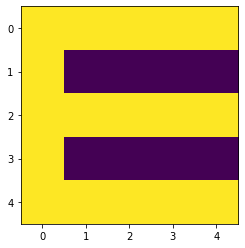

In [187]:
test_data = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, 1, 1, 1, 1, 1])
plt.imshow(test_data.reshape((5, 5)))
plt.show()

In [188]:
ans = prediction(np.append(test_data, 1), weights)
get_letter(ans)

Це літера E
